# Business Case: Aerofit -  Descriptive Statistics & Probability

# 1. Introduction

## What is Aerofit?


Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


## Objective

Create comprehensive customer profiles for each AeroFit treadmill product through descriptive analytics. Develop two-way contingency tables and analyze conditional and marginal probabilities to discern customer characteristics, facilitating improved product recommendations and informed business decisions.

## About Data

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during `three months`.The data is available in a single csv file

**Product Portfolio**

- The `KP281` is an `entry-level` treadmill that sells for `USD 1,500`.


- The `KP481` is for `mid-level` runners that sell for `USD 1,750`.


- The `KP781` treadmill is having `advanced features` that sell for `USD 2,500`.


## Features of the dataset:


| Feature | Description |
|:--------|:------------|
| Product | Product Purchased:	KP281, KP481, or KP781 |
| Age | Age of buyer in years |
| Gender | Gender of buyer (Male/Female) |
| Education | Education of buyer in years |
| MaritalStatus | MaritalStatus of buyer (Single or partnered) |
| Usage | The average number of times the buyer plans to use the treadmill each week |
| Income | Annual income of the buyer (in $) |
| Fitness | Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape |
| Miles | The average number of miles the buyer expects to walk/run each week |

# 2. Exploratory Data Analysis

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import copy
print("Setup Complete")

Setup Complete


In [2]:
# loading the dataset
Aerofit_df = pd.read_csv(r"D:\DSML\Case Studies\AeroFit\Aerofit.csv")
Aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
Aerofit_df.shape

(180, 9)

In [4]:
Aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
Aerofit_df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### Observations

- From the above analysis, it is clear that, data has total of 9 features with mixed alpha numeric data. Also we can see that there is no missing data in the columns.


- The data type of all the columns are matching with the data present in them. But we will change the datatype of Usage and Fitness into str(object).

## Statistical Summary

In [6]:
Aerofit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
Aerofit_df.describe(include = "object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


### Observations

**1. Age** - The age range of customers spans from `18 to 50 year`, with an average age of `29 years`.

**2. Education** - Customer education levels vary between `12 and 21 years`, with an average education duration of `16 years`.

**3. Usage** -  Customers intend to utilize the product anywhere from `2 to 7 times per week`, with an average usage frequency of `3 times per week`.

**4. Fitness** - On average, customers have rated their fitness at `3` on a 5-point scale, reflecting a `moderate level of fitness`.

**5. Income** -  The annual income of customers falls within the range of `USD 30,000 to USD 100,000`, with an average income of approximately `USD 54,000`.

**6. Miles** -  Customers' weekly running goals range from `21 to 360 miles`, with an average target of `103 miles per week`.

## Detecting Duplicates

In [8]:
Aerofit_df.duplicated().value_counts()

False    180
Name: count, dtype: int64

### Observations
- There are no duplicate entries in the dataset

## Sanity Check for columns

In [9]:
# checking the unique values for columns
for i in Aerofit_df.columns:
    print('Unique Values in',i,'column are :-')
    print(Aerofit_df[i].unique())
    print('-'*70)

Unique Values in Product column are :-
['KP281' 'KP481' 'KP781']
----------------------------------------------------------------------
Unique Values in Age column are :-
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
----------------------------------------------------------------------
Unique Values in Gender column are :-
['Male' 'Female']
----------------------------------------------------------------------
Unique Values in Education column are :-
[14 15 12 13 16 18 20 21]
----------------------------------------------------------------------
Unique Values in MaritalStatus column are :-
['Single' 'Partnered']
----------------------------------------------------------------------
Unique Values in Usage column are :-
[3 2 4 5 6 7]
----------------------------------------------------------------------
Unique Values in Fitness column are :-
[4 3 2 1 5]
----------------------------------------------------------------------
Unique Valu

### Observations

- The dataset does not contain any abnormal values.

## Adding new columns for better analysis

- Creating New Column and Categorizing values in `Age,Education,Income and Miles` to different classes for better visualization


#### Age Column

- Categorizing the values in age column in 4 different buckets:

1. Young Adult: from 18 - 25
2. Adults: from 26 - 35
3. Middle Aged Adults: 36-45
4. Elder :46 and above

#### Education Column

- Categorizing the values in education column in 3 different buckets:

1. Primary Education: upto 12
2. Secondary Education: 13 to 15
3. Higher Education: 16 and above

#### Income Column

- Categorizing the values in Income column in 4 different buckets:

1. Low Income - Upto 40,000
2. Moderate Income - 40,000 to 60,000
3. High Income - 60,000 to 80,000
4. Very High Income - Above 80,000

#### Miles column

- Categorizing the values in miles column in 4 different buckets:

1. Light Activity - Upto 50 miles
2. Moderate Activity - 51 to 100 miles
3. Active Lifestyle - 101 to 200 miles
4. Fitness Enthusiast - Above 200 miles

In [10]:
#binning the age values into categories
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young ', 'Adults', 'Middle Aged', 'Elder']

Aerofit_df['age_group'] = pd.cut(Aerofit_df['Age'],bins = bin_range1,labels = bin_labels1)

In [11]:
#binning the education values into categories
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']

Aerofit_df['edu_group'] = pd.cut(Aerofit_df['Education'],bins = bin_range2,labels = bin_labels2)


In [12]:
#binning the income values into categories
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Average Income','High Income','Very High Income']

Aerofit_df['income_group'] = pd.cut(Aerofit_df['Income'],bins = bin_range3,labels = bin_labels3)

In [13]:
#binning the miles values into categories
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Average Activity', 'Active Lifestyle', 'Fitness Enthusiast']

Aerofit_df['miles_group'] = pd.cut(Aerofit_df['Miles'],bins = bin_range4,labels = bin_labels4)

In [14]:
Aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Secondary Education,Low Income,Average Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Secondary Education,Low Income,Average Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Primary Education,Low Income,Average Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Secondary Education,Low Income,Light Activity


# 3.Univariate Analysis

## 3.1 Categorical Variables

###  3.1.1 Product Sales Distribution

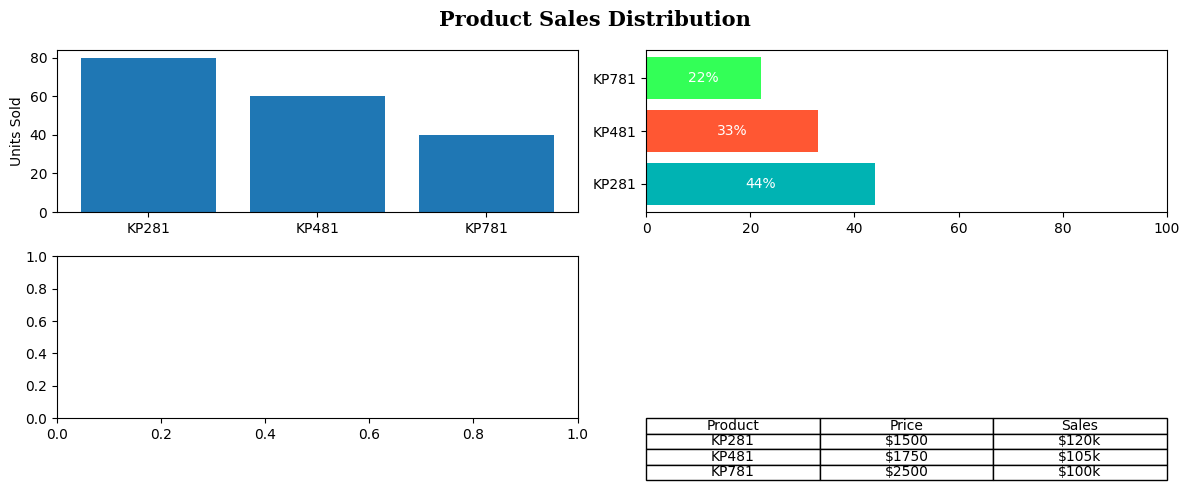

In [15]:
# Creating figure and gridspec
fig, axs = plt.subplots(2, 2, figsize=(12, 5))

# Plot for product column
product_count = Aerofit_df['Product'].value_counts()
axs[0, 0].bar(product_count.index, product_count.values)
axs[0, 0].set_ylabel('Units Sold')

# Plot for product % sale
product_percent = (product_count / len(Aerofit_df) * 100).round()
axs[0, 1].barh(product_percent.index, product_percent, color=['#00b3b3', '#FF5733', '#33FF57'])
axs[0, 1].set_xlim(0, 100)
for i, percent in enumerate(product_percent):
    axs[0, 1].text(percent / 2, i, f"{percent:.0f}%", va='center', ha='center', color='white')

# Plot for product portfolio
product_portfolio = [['KP281', '$1500', '$120k'], ['KP481', '$1750', '$105k'], ['KP781', '$2500', '$100k']]
axs[1, 1].axis('off')
axs[1, 1].table(cellText=product_portfolio, cellLoc='center', colLabels=['Product', 'Price', 'Sales'])

# Overall title
fig.suptitle('Product Sales Distribution', fontproperties={'family': 'serif', 'size': 15, 'weight': 'bold'})

plt.tight_layout()
plt.show()

### Observations

- The KP281 treadmill model, positioned as an entry-level product, has the highest number of units sold, trailed by the KP481 (mid-level) and KP781 (advanced) models.


- All three models have nearly equal contributions in terms of generating sales revenue.

### 3.1.2 Gender and Marital Status Disribution

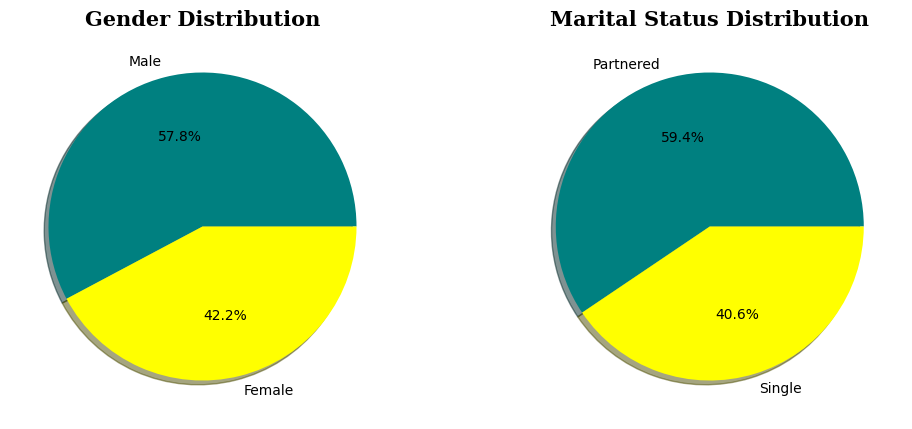

In [16]:
# Setting the plot style
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart for gender distribution
gender_counts = Aerofit_df['Gender'].value_counts()
axs[0].pie(gender_counts.values, labels=gender_counts.index, autopct='%.1f%%', colors=['teal', 'yellow'], shadow=True)
axs[0].set_title('Gender Distribution', fontdict={'fontname': 'serif', 'fontsize': 15, 'fontweight': 'bold'})

# Pie chart for marital status distribution
marital_counts = Aerofit_df['MaritalStatus'].value_counts()
axs[1].pie(marital_counts.values, labels=marital_counts.index, autopct='%.1f%%', colors=['teal', 'yellow'], shadow=True)
axs[1].set_title('Marital Status Distribution', fontdict={'fontname': 'serif', 'fontsize': 15, 'fontweight': 'bold'})

plt.show()


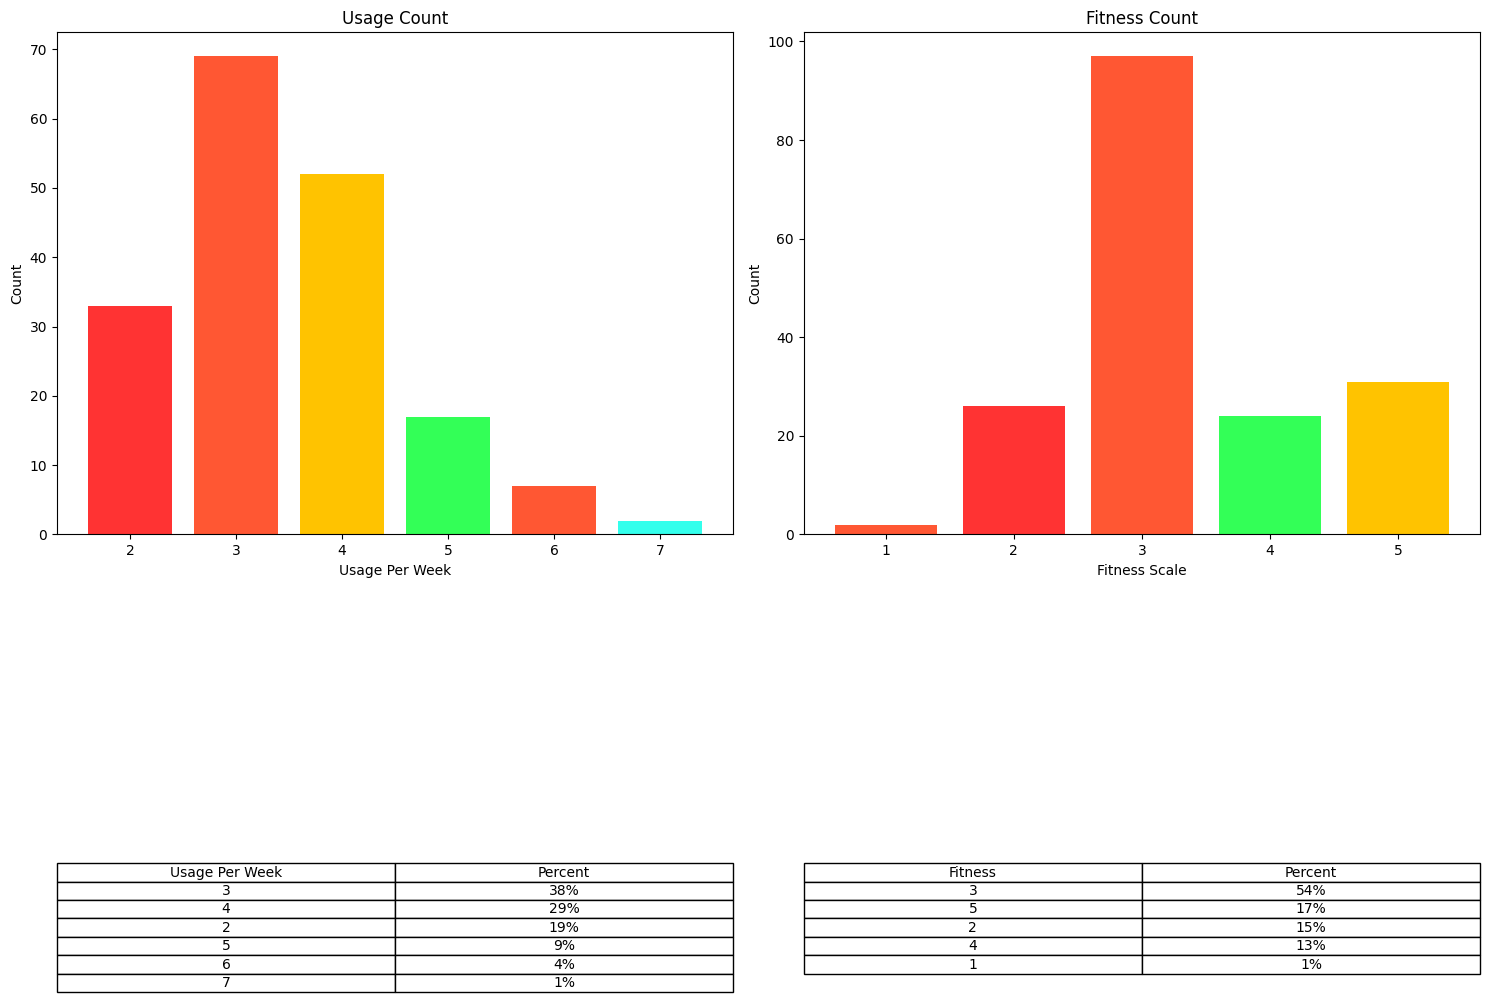

In [17]:
# Setting the plot style
fig, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'height_ratios': [0.65, 0.35]})

# Usage distribution bar chart
usage_counts = Aerofit_df['Usage'].value_counts()
axs[0, 0].bar(usage_counts.index, usage_counts.values, color = ['#FF5733', '#FFC300', '#FF3333', '#33FF57', '#FF5733', '#33FFEC'])
axs[0, 0].set(title='Usage Count', xlabel='Usage Per Week', ylabel='Count')

# Usage info table
usage_info = [['3', '38%'], ['4', '29%'], ['2', '19%'], ['5', '9%'], ['6', '4%'], ['7', '1%']]
axs[1, 0].axis('off')
axs[1, 0].table(cellText=usage_info, cellLoc='center', colLabels=['Usage Per Week', 'Percent'])

# Fitness distribution bar chart
fitness_counts = Aerofit_df['Fitness'].value_counts()
axs[0, 1].bar(fitness_counts.index, fitness_counts.values, color = ['#FF5733', '#FFC300', '#FF3333', '#33FF57', '#FF5733', '#33FFEC'])
axs[0, 1].set(title='Fitness Count', xlabel='Fitness Scale', ylabel='Count')

# Fitness info table
fitness_info = [['3', '54%'], ['5', '17%'], ['2', '15%'], ['4', '13%'], ['1', '1%']]
axs[1, 1].axis('off')
axs[1, 1].table(cellText=fitness_info, cellLoc='center', colLabels=['Fitness', 'Percent'])

plt.tight_layout()
plt.show()


### Observations

- Almost `85%` of the customers plan to use the treadmill for `2 to 4 times a week` and only 15% using 5 times and above each week


- 54% of the customers have self-evaluated their fitness at a level 3 on a scale of 1 to 5. Furthermore, a substantial 84% of the total customers have rated themselves at 3 or higher, indicating commendable fitness levels.

## 3.2 Numerical Variables


### 3.2.1 Customer Age Distribution

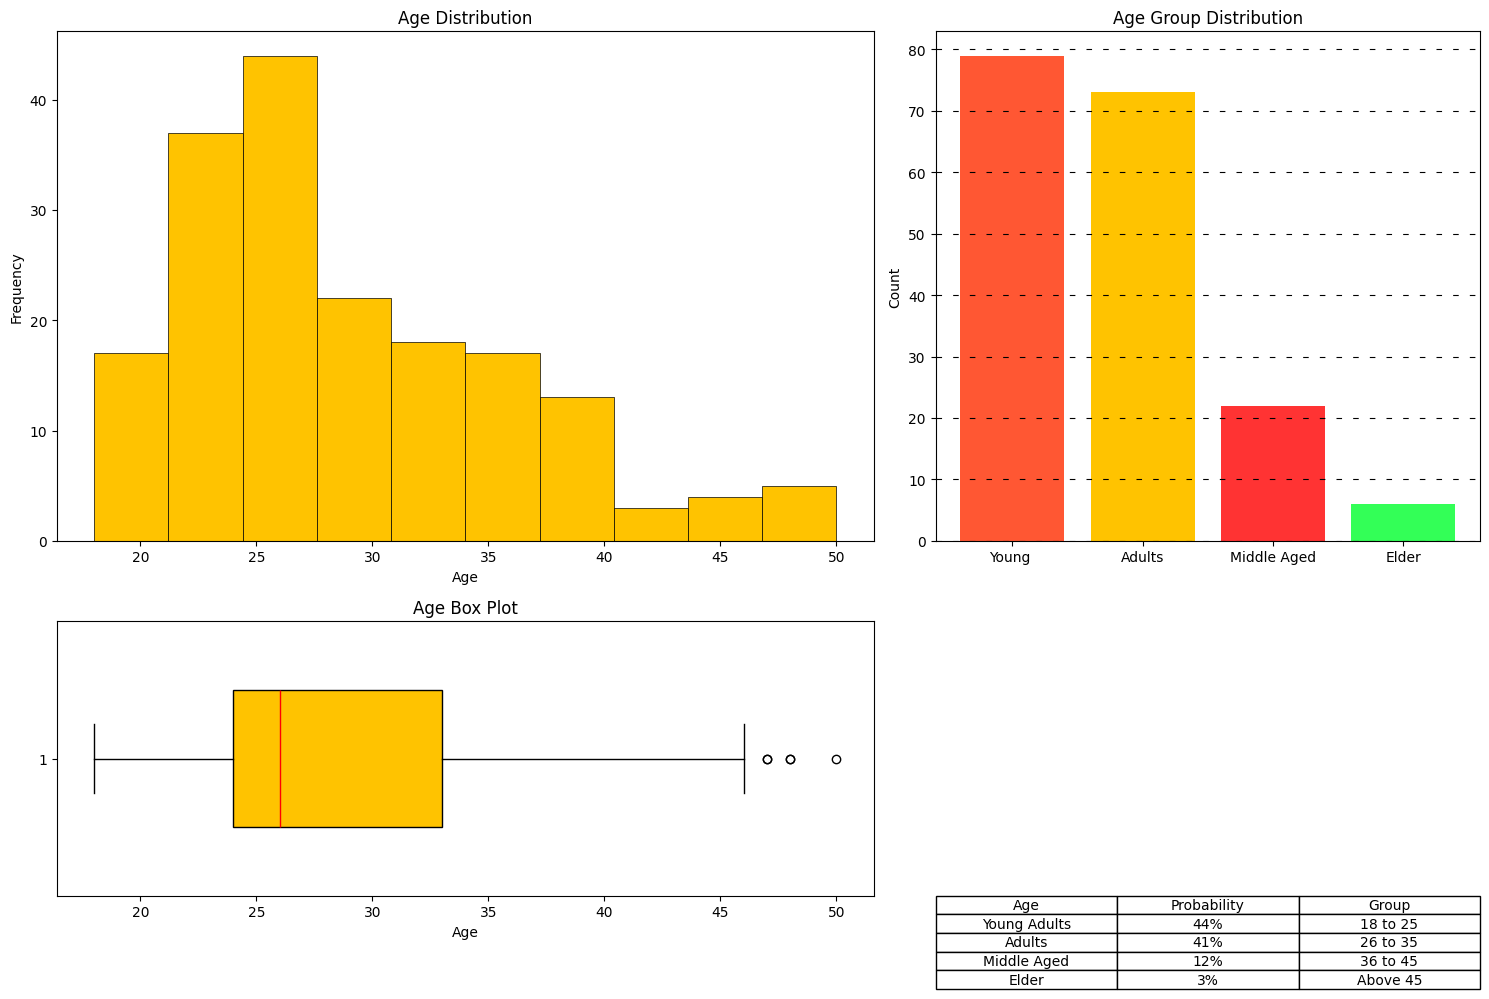

In [18]:
# Setting the plot style
fig, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'height_ratios': [0.65, 0.35], 'width_ratios': [0.6, 0.4]})

# Age distribution histogram
axs[0, 0].hist(Aerofit_df['Age'], color='#FFC300', linewidth=0.5, edgecolor='black')
axs[0, 0].set(title='Age Distribution', xlabel='Age', ylabel='Frequency')

# Age group distribution bar chart
age_group_counts = Aerofit_df['age_group'].value_counts()
axs[0, 1].bar(age_group_counts.index, age_group_counts.values, color=['#FF5733', '#FFC300', '#FF3333', '#33FF57', '#FF5733', '#33FFEC'])
axs[0, 1].grid(color='black', linestyle='--', axis='y', dashes=(5, 10))
axs[0, 1].set(title='Age Group Distribution', ylabel='Count')

# Box plot for age
axs[1, 0].boxplot(x=Aerofit_df['Age'], vert=False, patch_artist=True, widths=0.5, boxprops=dict(facecolor='#FFC300'), medianprops=dict(color='red'))
axs[1, 0].set(title='Age Box Plot', xlabel='Age')

# Age group info table
age_info = [['Young Adults', '44%', '18 to 25'], ['Adults', '41%', '26 to 35'], ['Middle Aged', '12%', '36 to 45'], ['Elder', '3%', 'Above 45']]
axs[1, 1].axis('off')
axs[1, 1].table(cellText=age_info, cellLoc='center', colLabels=['Age', 'Probability', 'Group'])

plt.tight_layout()
plt.show()


### Observations

- `85%` of the customers fall in the age range of `18 to 35`. with a median age of `26`, suggesting young people showing more interest in the companies products


- **Outliers**
    
     - As we can see from the box plot, there are `3 outlier's` present in the age data.

### 3.2.2 Customer Education Distribution

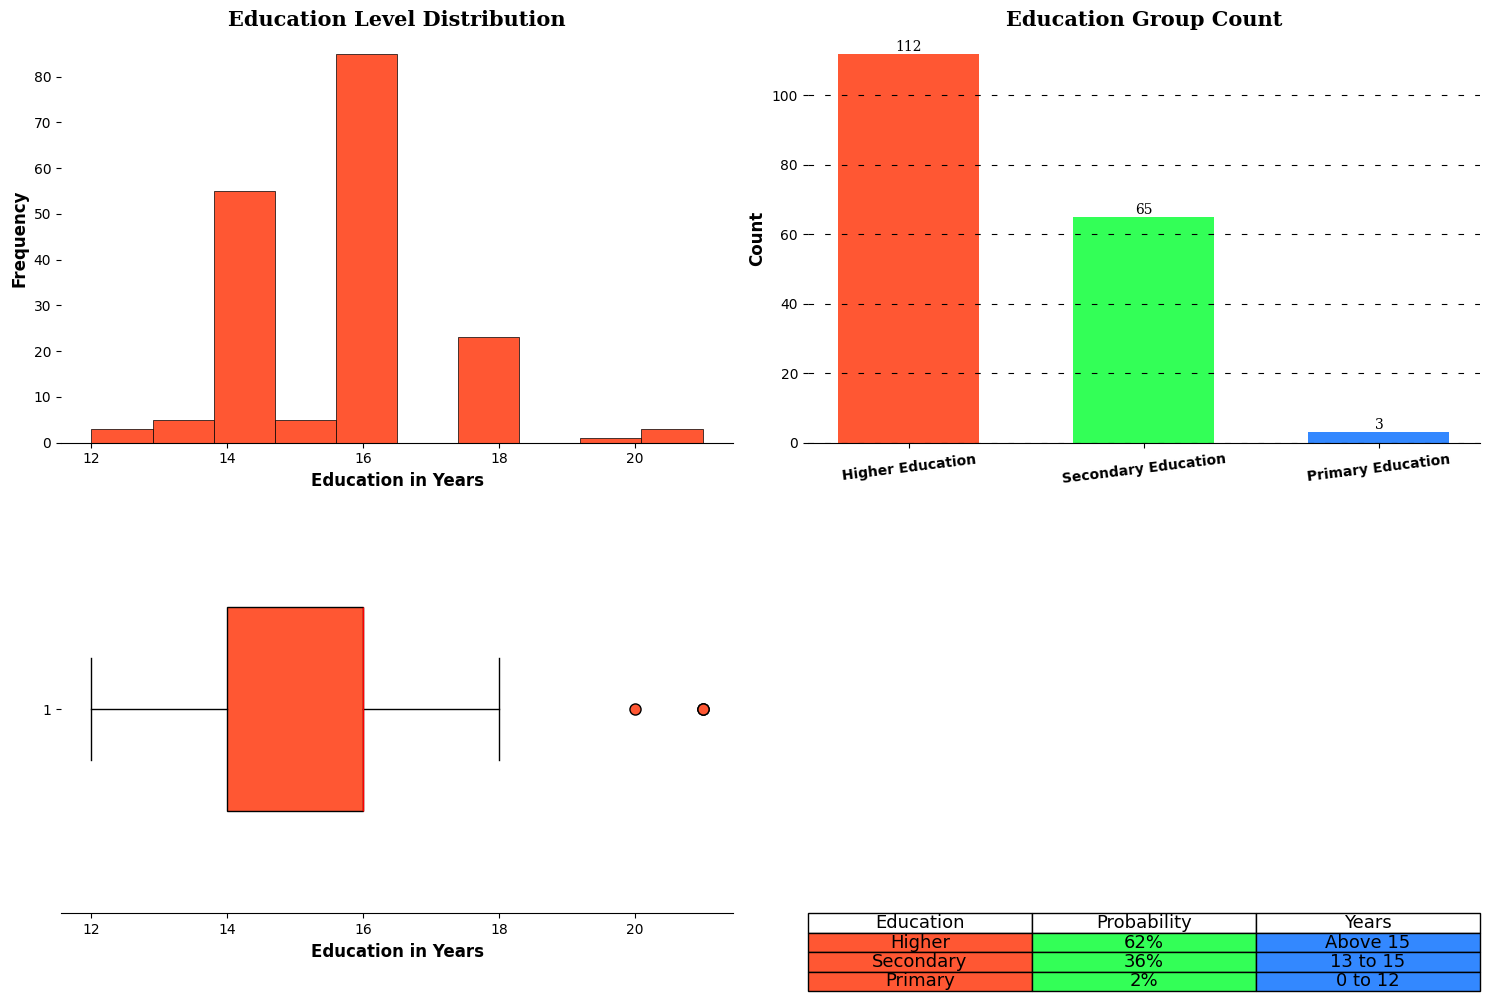

In [19]:
# Set brighter colors
bright_colors = ['#FF5733', '#33FF57', '#3388FF']

# Create figure and gridspec
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Education histogram
axs[0, 0].hist(Aerofit_df['Education'], color='#FF5733', linewidth=0.5, edgecolor='black')
axs[0, 0].set_xlabel('Education in Years', fontsize=12, fontweight='bold')
axs[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axs[0, 0].set_title('Education Level Distribution', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Box plot for education
boxplot = axs[1, 0].boxplot(x=Aerofit_df['Education'], vert=False, patch_artist=True, widths=0.5)
boxplot['boxes'][0].set(facecolor='#FF5733')  # Customize box color
boxplot['medians'][0].set(color='red')  # Customize median line
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor='#FF5733')  # Customize outlier markers
axs[1, 0].set_xlabel('Education in Years', fontweight='bold', fontsize=12)

# Education group bar chart
temp = Aerofit_df['edu_group'].value_counts()
axs[0, 1].bar(x=temp.index, height=temp.values, color=bright_colors, width=0.6)
for i in temp.index:
    axs[0, 1].text(i, temp[i] + 2, temp[i], {'font': 'serif', 'size': 10}, ha='center', va='center')
axs[0, 1].grid(color='black', linestyle='--', axis='y', dashes=(5, 10))
axs[0, 1].set_ylabel('Count', fontweight='bold', fontsize=12)
axs[0, 1].set_xticklabels(temp.index, fontweight='bold', rotation=7)
axs[0, 1].set_title('Education Group Count', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Table for group info
edu_info = [['Higher', '62%', 'Above 15'], ['Secondary', '36%', '13 to 15'], ['Primary', '2%', '0 to 12']]
table = axs[1, 1].table(cellText=edu_info, cellColours=[bright_colors] * 3, cellLoc='center',
                        colLabels=['Education', 'Probability', 'Years'], colLoc='center')
table.set_fontsize(13)
axs[1, 1].axis('off')

# Remove spines
for ax in axs.flatten():
    for spine in ['top', 'left', 'right']:
        ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


### Observations

- `98%` of the customers have education more than 13 years highlighting a strong inclination among well-educated individuals to purchase the products. It's plausible that health awareness driven by education could play a pivotal role in this trend.


- **Outliers**
    
     - As we can see from the box plot, there are `2 outlier's` present in the education data.

### 3.2.3 Customer Income Distribution

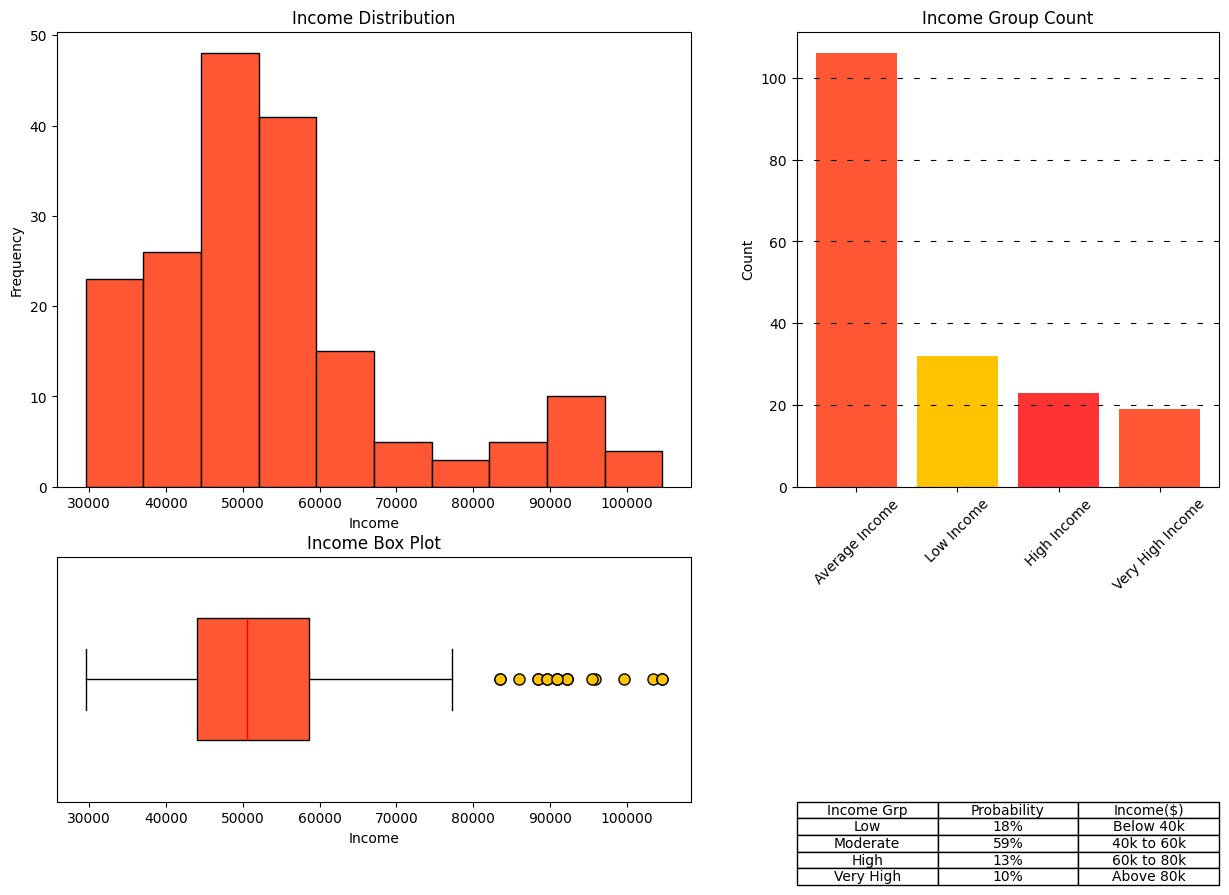

In [20]:
# Setting the plot style
fig, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'height_ratios': [0.65, 0.35], 'width_ratios': [0.6, 0.4]})

# Income distribution histogram
axs[0, 0].hist(Aerofit_df['Income'], color='#FF5733', edgecolor='black')
axs[0, 0].set(title='Income Distribution', xlabel='Income', ylabel='Frequency')

# Box plot for income
boxplot = axs[1, 0].boxplot(Aerofit_df['Income'], vert=False, patch_artist=True, widths=0.5)
boxplot['boxes'][0].set(facecolor='#FF5733')
boxplot['medians'][0].set(color='red')
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor='#FFC300')
axs[1, 0].set(title='Income Box Plot', xlabel='Income')
axs[1, 0].set_yticks([])

# Income group distribution bar chart
income_group_counts = Aerofit_df['income_group'].value_counts()
axs[0, 1].bar(income_group_counts.index, income_group_counts.values, color=["#FF5733", "#FFC300", '#FF3333'])
axs[0, 1].grid(color='black', linestyle='--', axis='y', dashes=(5, 10))
axs[0, 1].set(title='Income Group Count', ylabel='Count')
axs[0, 1].set_xticklabels(income_group_counts.index, rotation=45)

# Income group info table
income_info = [['Low', '18%', 'Below 40k'], ['Moderate', '59%', '40k to 60k'], ['High', '13%', '60k to 80k'],
                ['Very High', '10%', 'Above 80k']]
axs[1, 1].axis('off')
axs[1, 1].table(cellText=income_info, cellLoc='center',
                  colLabels=['Income Grp', 'Probability', 'Income($)'])

plt.show()


### Observations

- Almost `60%` of the customers fall in the income group of (40k to 60k) dollars suggesting higher inclination of this income group people towards the products.


- Surprisingly `18%` of the customers fall in the income group of (<40) suggesting almost `77%` of the total customers fall in income group of below 60k and only `23%` of them falling in 60k and above income group


- **Outliers**
    
     - As we can see from the box plot, there are `many outlier's` present in the income data.

###  3.2.4 Customers Expected Weekly Mileage

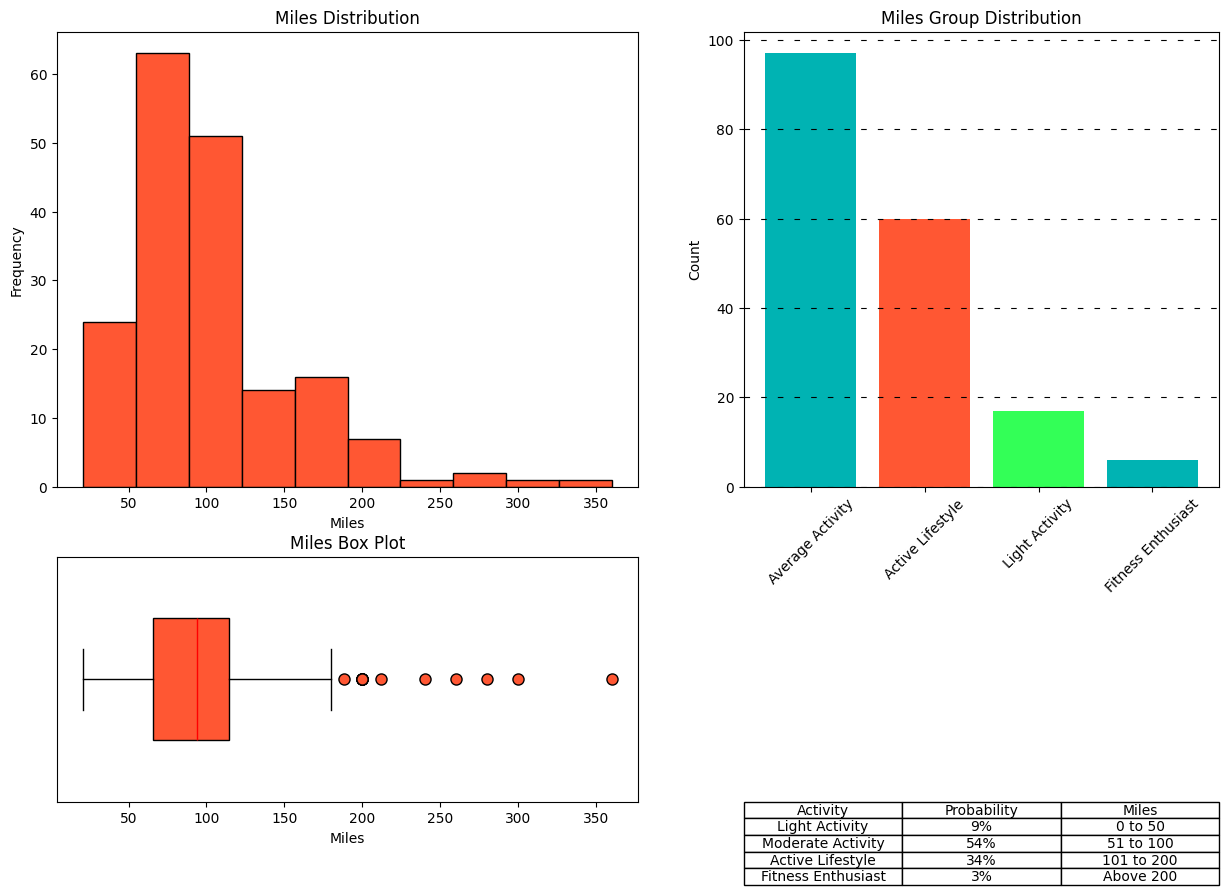

In [21]:
# Setting the plot style
fig, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'height_ratios': [0.65, 0.35], 'width_ratios': [0.55, 0.45]})

# Miles distribution histogram
axs[0, 0].hist(Aerofit_df['Miles'], color='#FF5733', edgecolor='black')
axs[0, 0].set(title='Miles Distribution', xlabel='Miles', ylabel='Frequency')

# Box plot for miles
boxplot = axs[1, 0].boxplot(Aerofit_df['Miles'], vert=False, patch_artist=True, widths=0.5)
boxplot['boxes'][0].set(facecolor='#FF5733')
boxplot['medians'][0].set(color='red')
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor='#FF5733')
axs[1, 0].set(title='Miles Box Plot', xlabel='Miles')
axs[1, 0].set_yticks([])

# Miles group distribution bar chart
miles_group_counts = Aerofit_df['miles_group'].value_counts()
axs[0, 1].bar(miles_group_counts.index, miles_group_counts.values, color=['#00b3b3', '#FF5733', '#33FF57'])
axs[0, 1].grid(color='black', linestyle='--', axis='y', dashes=(5, 10))
axs[0, 1].set(title='Miles Group Distribution', ylabel='Count')
axs[0, 1].set_xticklabels(miles_group_counts.index, rotation=45)

# Miles group info table
miles_info = [['Light Activity', '9%', '0 to 50'], ['Moderate Activity', '54%', '51 to 100'],
              ['Active Lifestyle', '34%', '101 to 200'], ['Fitness Enthusiast', '3%', 'Above 200']]
axs[1, 1].axis('off')
axs[1, 1].table(cellText=miles_info, cellLoc='center', colLabels=['Activity', 'Probability', 'Miles'])

plt.show()


### Observations

- Almost `88%` of the customers plans to use the treadmill for `50 to 200 miles` per week with a median of `94 miles per week`.


- **Outliers**
    
     - As we can see from the box plot, there are `8 outlier's` present in the miles data.

# 4. Bivariate Analysis



## 4.1 Analysis of Product Type

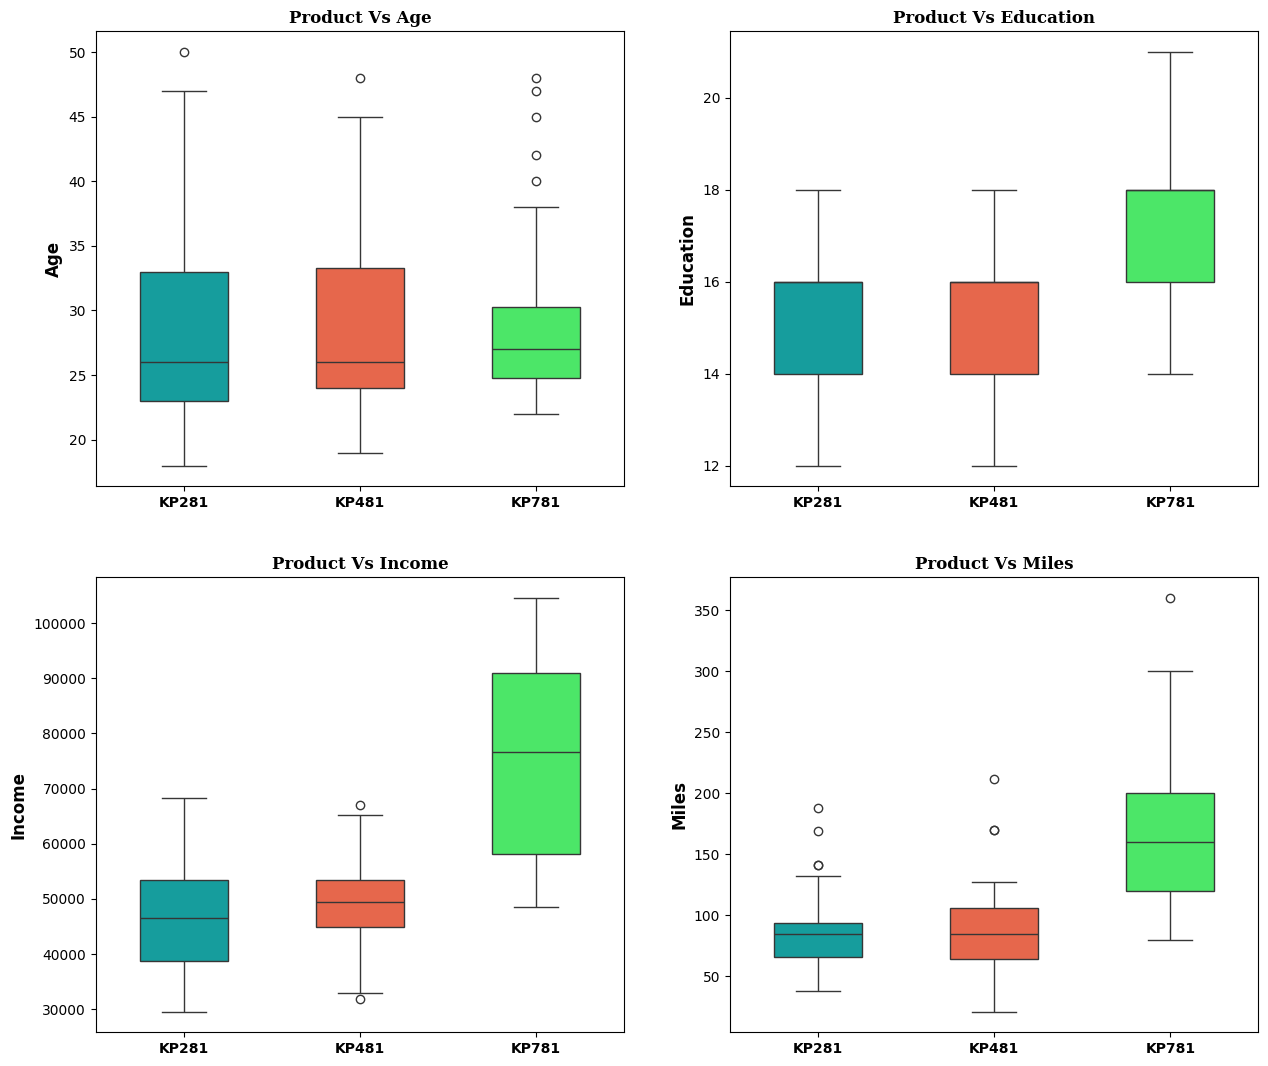

In [22]:
# Setting the plot style
fig, axs = plt.subplots(2, 2, figsize=(15, 13))

for i, j, k in [(0, 0, 'Age'), (0, 1, 'Education'), (1, 0, 'Income'), (1, 1, 'Miles')]:
    # Plot position
    ax = axs[i, j]

    # Plot
    sns.boxplot(data=Aerofit_df, x='Product', y=k, ax=ax, width=0.5, palette=['#00b3b3', '#FF5733', '#33FF57'])

    # Plot title
    ax.set_title(f'Product Vs {k}', fontdict={'font': 'serif', 'size': 12, 'weight': 'bold'})

    # Customizing axis
    ax.set_xticklabels(Aerofit_df['Product'].unique(), fontweight='bold')
    ax.set_ylabel(f'{k}', fontweight='bold', fontsize=12)
    ax.set_xlabel('')

plt.show()


### Observations

- The analysis presented above clearly indicates a strong preference for the treadmill model `KP781` among customers who possess **higher education, higher income levels, and intend to engage in running activities exceeding 150 miles per week.**

## 4.2 Product Preferences Across Age

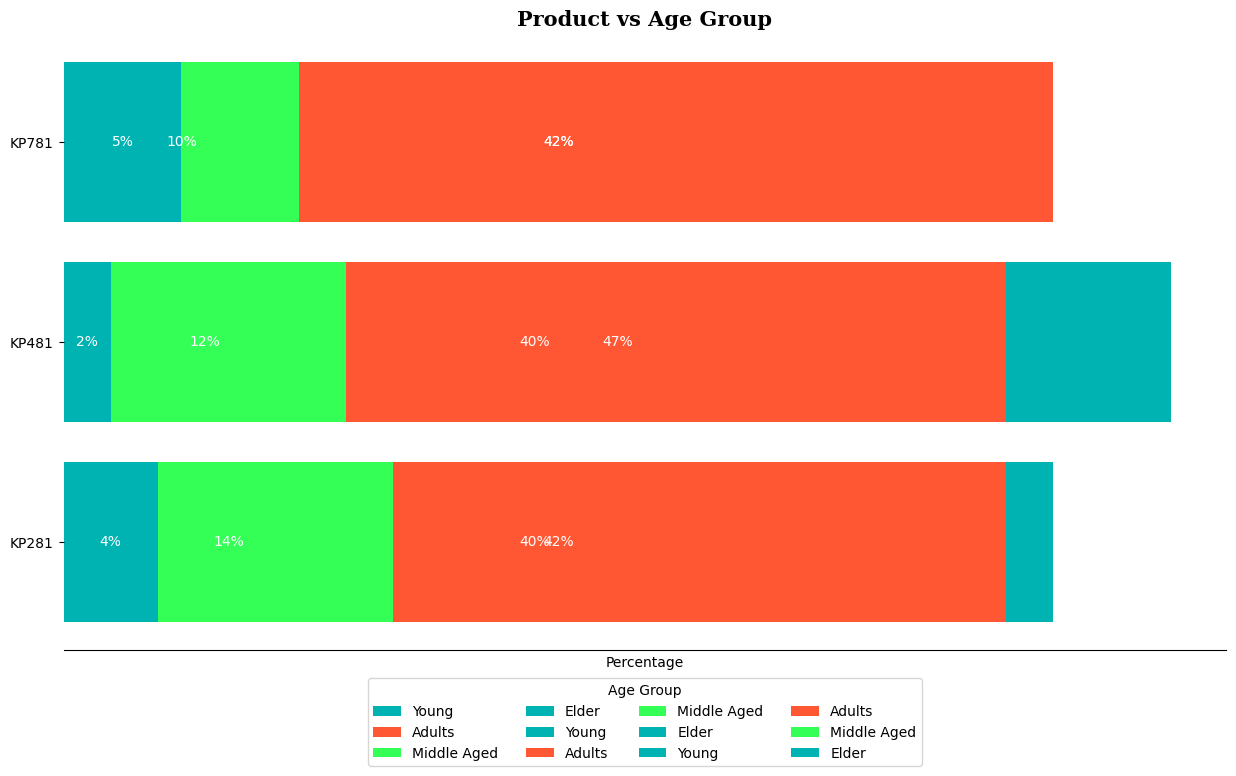

In [23]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Group by 'Product' and 'age_group'
df_grp = Aerofit_df.groupby('Product')['age_group'].value_counts(normalize=True).unstack().round(2)

# Define bright colors for each age group
colors = ['#00b3b3', '#FF5733', '#33FF57']

# Plot the horizontal bar chart
for i, (product, data) in enumerate(df_grp.iterrows()):
    ax.barh(product, data, color=colors, label=data.index)
    for j, value in enumerate(data):
        ax.text(value / 2, i, f'{value:.0%}', ha='center', va='center', color='white', fontsize=10)

# Customize the plot
ax.set_title('Product vs Age Group', fontdict={'fontname': 'serif', 'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel('Percentage')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.set_xticks([])

# Add legend
ax.legend(title='Age Group', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=10)

plt.show()


### Observations

- The analysis provided above distinctly demonstrates that there exists no strong correlation between age groups and product preferences. This is evident from the **nearly uniform distribution of age groups across all the products.**

## 4.3 Product Preferences Across Education Levels

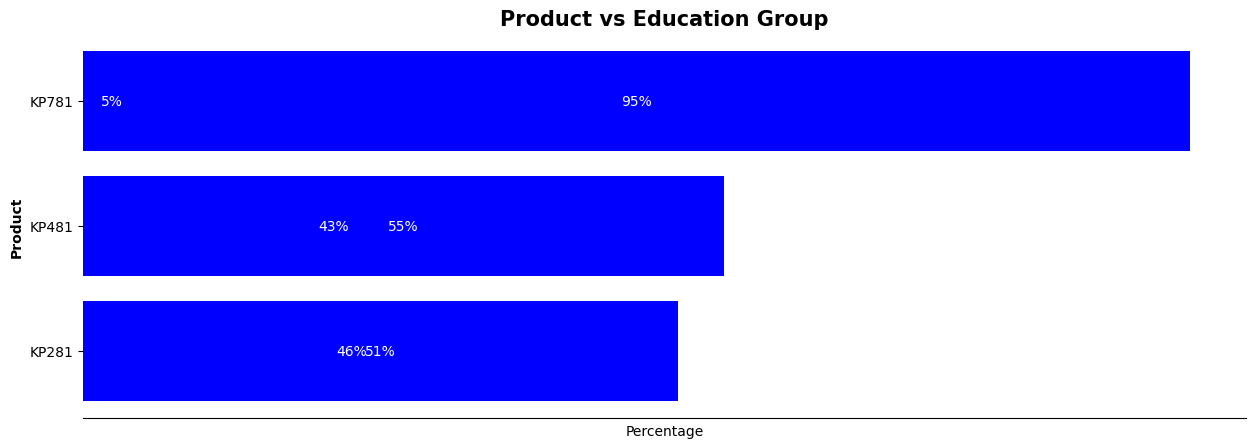

In [24]:
# Group the dataframe by 'Product' and 'edu_group', and calculate percentages
df_grp = Aerofit_df.groupby('Product')['edu_group'].value_counts(normalize=True).unstack().round(2)

# Define bright colors for each education group
colors = ["yellow","red","Blue","teal"]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the horizontal bar chart
for i, (product, data) in enumerate(df_grp.iterrows()):
    left = np.zeros(len(data))
    for j, (edu_group, value) in enumerate(data.items()):
        if value < 0.05:
            continue
        ax.barh(product, value, left=left[j], color=colors[j])
        ax.text(left[j] + value / 2, i, f'{value:.0%}', ha='center', va='center', color='white', fontsize=10)
        left[j] += value

# Customize the plot
ax.set_title('Product vs Education Group', fontweight='bold', fontsize=15)
ax.set_xlabel('Percentage')
ax.set_ylabel('Product', fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])

# Show the plot
plt.show()


### Observations

- The analysis provided above cleary demonstrates the preference of `Highly Educated people` for treadmill model `KP781`


- For treadmill models `KP481` and `KP281`, the distribution of customer with `Secondary Education` and with `Higher Education` is almost equal

## 4.4 Product Preference Across Income Group

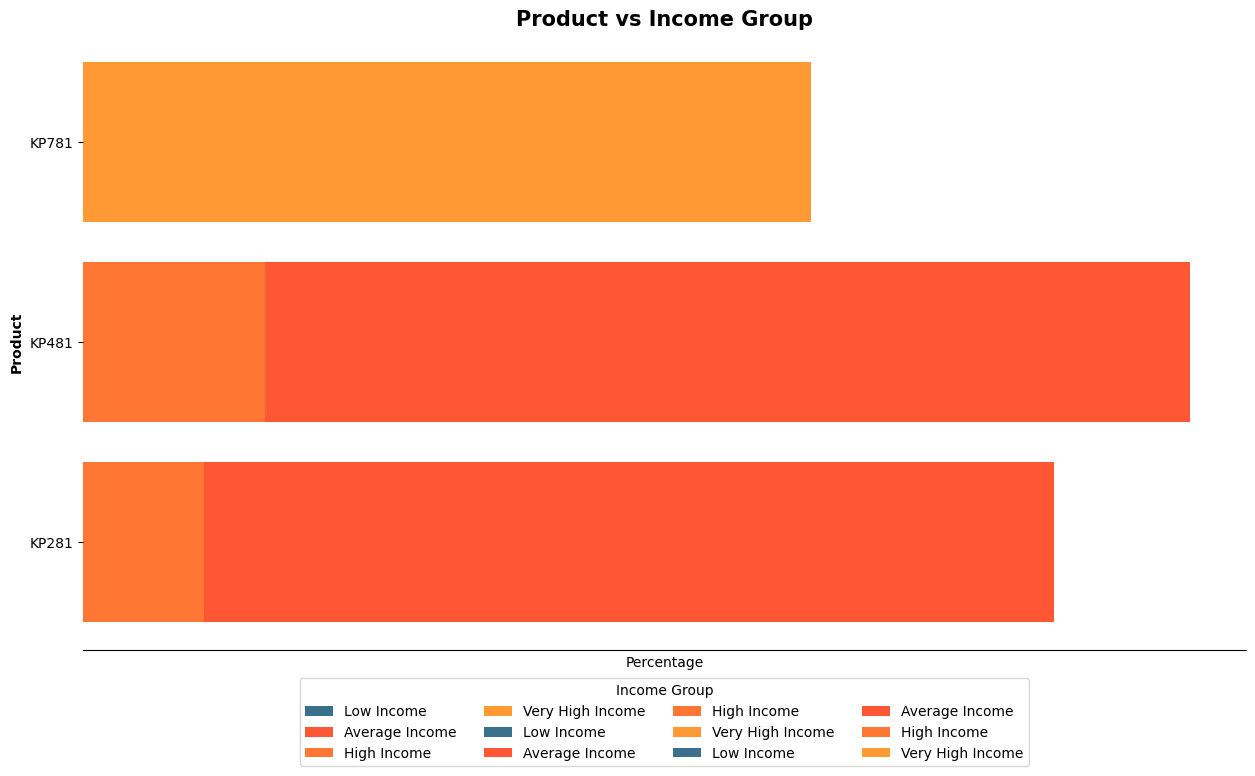

In [25]:
# Group the dataframe by 'Product' and 'income_group', and calculate percentages
df_grp = Aerofit_df.groupby('Product')['income_group'].value_counts(normalize=True).unstack().round(2)

# Define bright colors for each income group
colors = ["#3A7089","#FF5733", "#FF7733", "#FF9933", "#FFBB33", "#FFDD33", "#FFFF33"]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the horizontal bar chart
for i, (product, data) in enumerate(df_grp.iterrows()):
    ax.barh(product, data, color=colors, label=data.index)

# Customize the plot
ax.set_title('Product vs Income Group', fontweight='bold', fontsize=15)
ax.set_xlabel('Percentage')
ax.set_ylabel('Product', fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])

# Add legend
ax.legend(title='Income Group', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=10)

# Show the plot
plt.show()


### Observations

- Treadmill model `KP781` is preferred more by customers with `Very High Income`


- Both treadmill models, `KP481` and `KP281`, are preferred more by customers with `Moderate Income`

## 4.5 Product preference across customer weekly mileage

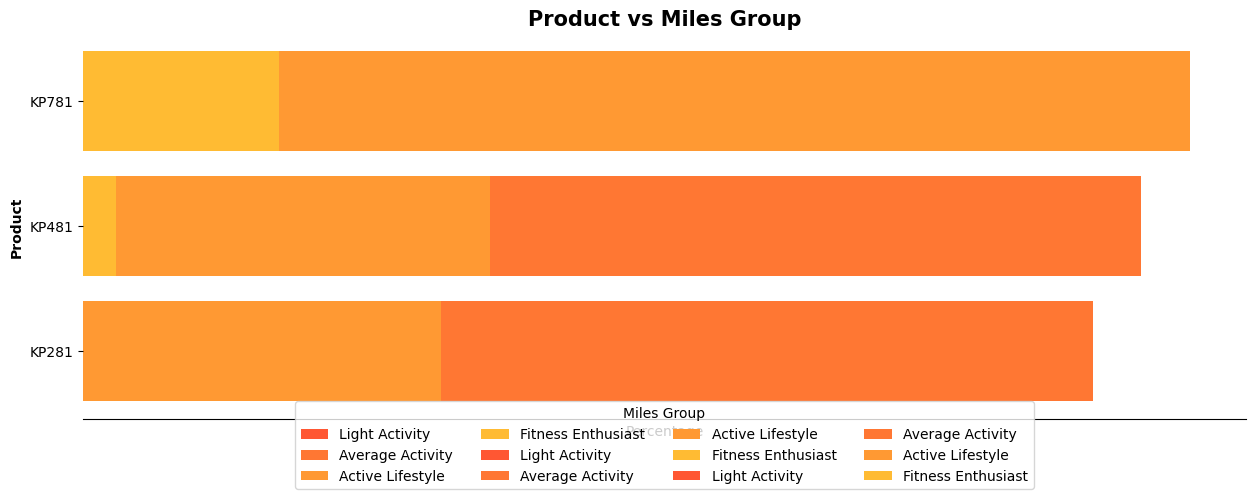

In [26]:
# Group the dataframe by 'Product' and 'miles_group', and calculate percentages
df_grp = Aerofit_df.groupby('Product')['miles_group'].value_counts(normalize=True).unstack().round(2)

# Define bright colors for each miles group
colors = ["#FF5733", "#FF7733", "#FF9933", "#FFBB33", "#FFDD33", "#FFFF33"]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the horizontal bar chart
for i, (product, data) in enumerate(df_grp.iterrows()):
    ax.barh(product, data, color=colors, label=data.index)

# Customize the plot
ax.set_title('Product vs Miles Group', fontweight='bold', fontsize=15)
ax.set_xlabel('Percentage')
ax.set_ylabel('Product', fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])

# Add legend
ax.legend(title='Miles Group', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=10)

# Show the plot
plt.show()


### Observations

- Treadmill model `KP781` is preferred more by customers planning to run `100 to 200 miles per week`


- Both treadmill models, `KP481` and `KP281`, are preferred more by customers planning to run `50 to 100 miles per week`

## 4.6 Product Preference across Gender and Marital Status

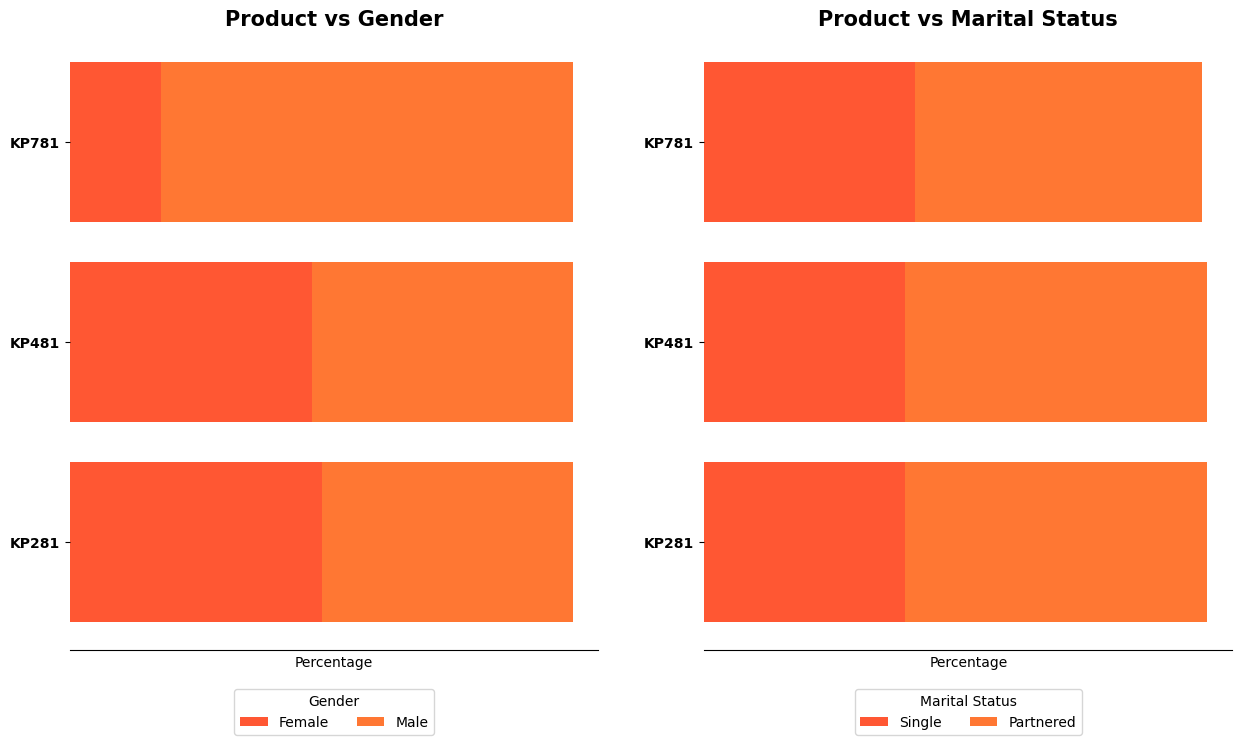

In [27]:
# Group by 'Product', 'Gender', and 'MaritalStatus', and calculate percentages
df_grp_gender = Aerofit_df.groupby('Product')['Gender'].value_counts(normalize=True).unstack().round(2)
df_grp_marital = Aerofit_df.groupby('Product')['MaritalStatus'].value_counts(normalize=True).unstack().round(2)

# Define bright colors for each category
colors = ["#FF5733", "#FF7733", "#FF9933", "#FFBB33", "#FFDD33", "#FFFF33"]

# Create the figure and gridspec
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for Gender
axs[0].barh(df_grp_gender.index, df_grp_gender['Female'], color=colors[0], label='Female')
axs[0].barh(df_grp_gender.index, df_grp_gender['Male'], left=df_grp_gender['Female'], color=colors[1], label='Male')

# Customize the plot for Gender
axs[0].set_title('Product vs Gender', fontweight='bold', fontsize=15)
axs[0].set_xlabel('Percentage')
axs[0].set_yticklabels(df_grp_gender.index, fontweight='bold')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].set_xticks([])
axs[0].legend(title='Gender', loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=10)

# Plot for MaritalStatus
axs[1].barh(df_grp_marital.index, df_grp_marital['Single'], color=colors[0], label='Single')
axs[1].barh(df_grp_marital.index, df_grp_marital['Partnered'], left=df_grp_marital['Single'], color=colors[1], label='Partnered')

# Customize the plot for MaritalStatus
axs[1].set_title('Product vs Marital Status', fontweight='bold', fontsize=15)
axs[1].set_xlabel('Percentage')
axs[1].set_yticklabels(df_grp_marital.index, fontweight='bold')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_xticks([])
axs[1].legend(title='Marital Status', loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=10)

plt.show()


### Observations

**1. Gender**

- Treadmill model `KP781` is preferred more by `male customers`.


- Both treadmill models, `KP481` and `KP281`, show `equal distribution` of both the gender

**2. Marital Status**

- For all the three treadmill models, there is `uniform distribution` of Married and Single customers with **married customers** showing `slighly higher preference`

## 4.7  Gender vs Product Usage And Gender Vs Fitness

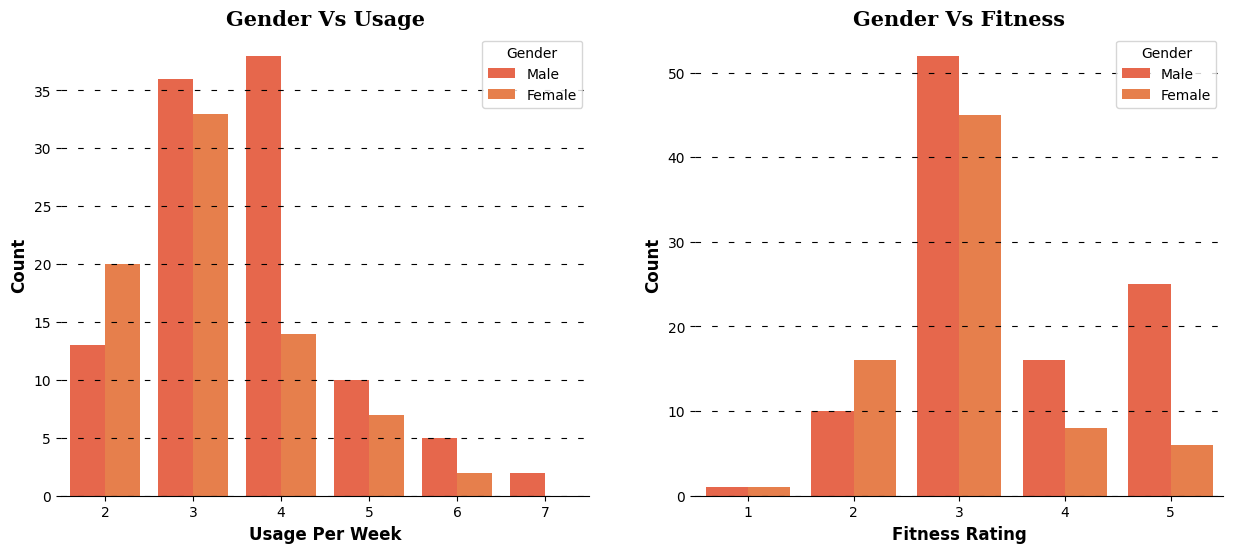

In [28]:
# Create the figure and gridspec
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Usage Vs Gender
sns.countplot(data=Aerofit_df, x='Usage', hue='Gender', order=sorted(Aerofit_df['Usage'].unique()), palette=["#FF5733", "#FF7733", "#FF9933", "#FFBB33", "#FFDD33", "#FFFF33"], ax=axs[0])
axs[0].set_xlabel('Usage Per Week', fontweight='bold', fontsize=12)
axs[0].set_ylabel('Count', fontweight='bold', fontsize=12)
axs[0].set_title('Gender Vs Usage', fontdict={'font': 'serif', 'size': 15, 'weight': 'bold'})
axs[0].grid(color='black', linestyle='--', axis='y', dashes=(5, 10))
axs[0].spines['top'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Fitness Vs Gender
sns.countplot(data=Aerofit_df, x='Fitness', hue='Gender', order=sorted(Aerofit_df['Fitness'].unique()), palette=["#FF5733", "#FF7733", "#FF9933", "#FFBB33", "#FFDD33", "#FFFF33"], ax=axs[1])
axs[1].set_xlabel('Fitness Rating', fontweight='bold', fontsize=12)
axs[1].set_ylabel('Count', fontweight='bold', fontsize=12)
axs[1].set_title('Gender Vs Fitness', fontdict={'font': 'serif', 'size': 15, 'weight': 'bold'})
axs[1].grid(color='black', linestyle='--', axis='y', dashes=(5, 10))
axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['right'].set_visible(False)

plt.show()


### Observations

**1. Gender Vs Usage**

- Almost `70% of Female customers` plan to use the treadmill for `2 to 3 times a week` whereas almost `70% of Male customer` plan to use the treadmill for `3 to 4 times a week`

**2. Gender Vs Fitness**

- Almost `80% of Female customers` rated themselves between `2 to 3` whereas almost `90% of Male customer` rated themselves between `3 to 5` on the fitness scale

# 5. Correlation between Variables

## 5.1 Pairplot

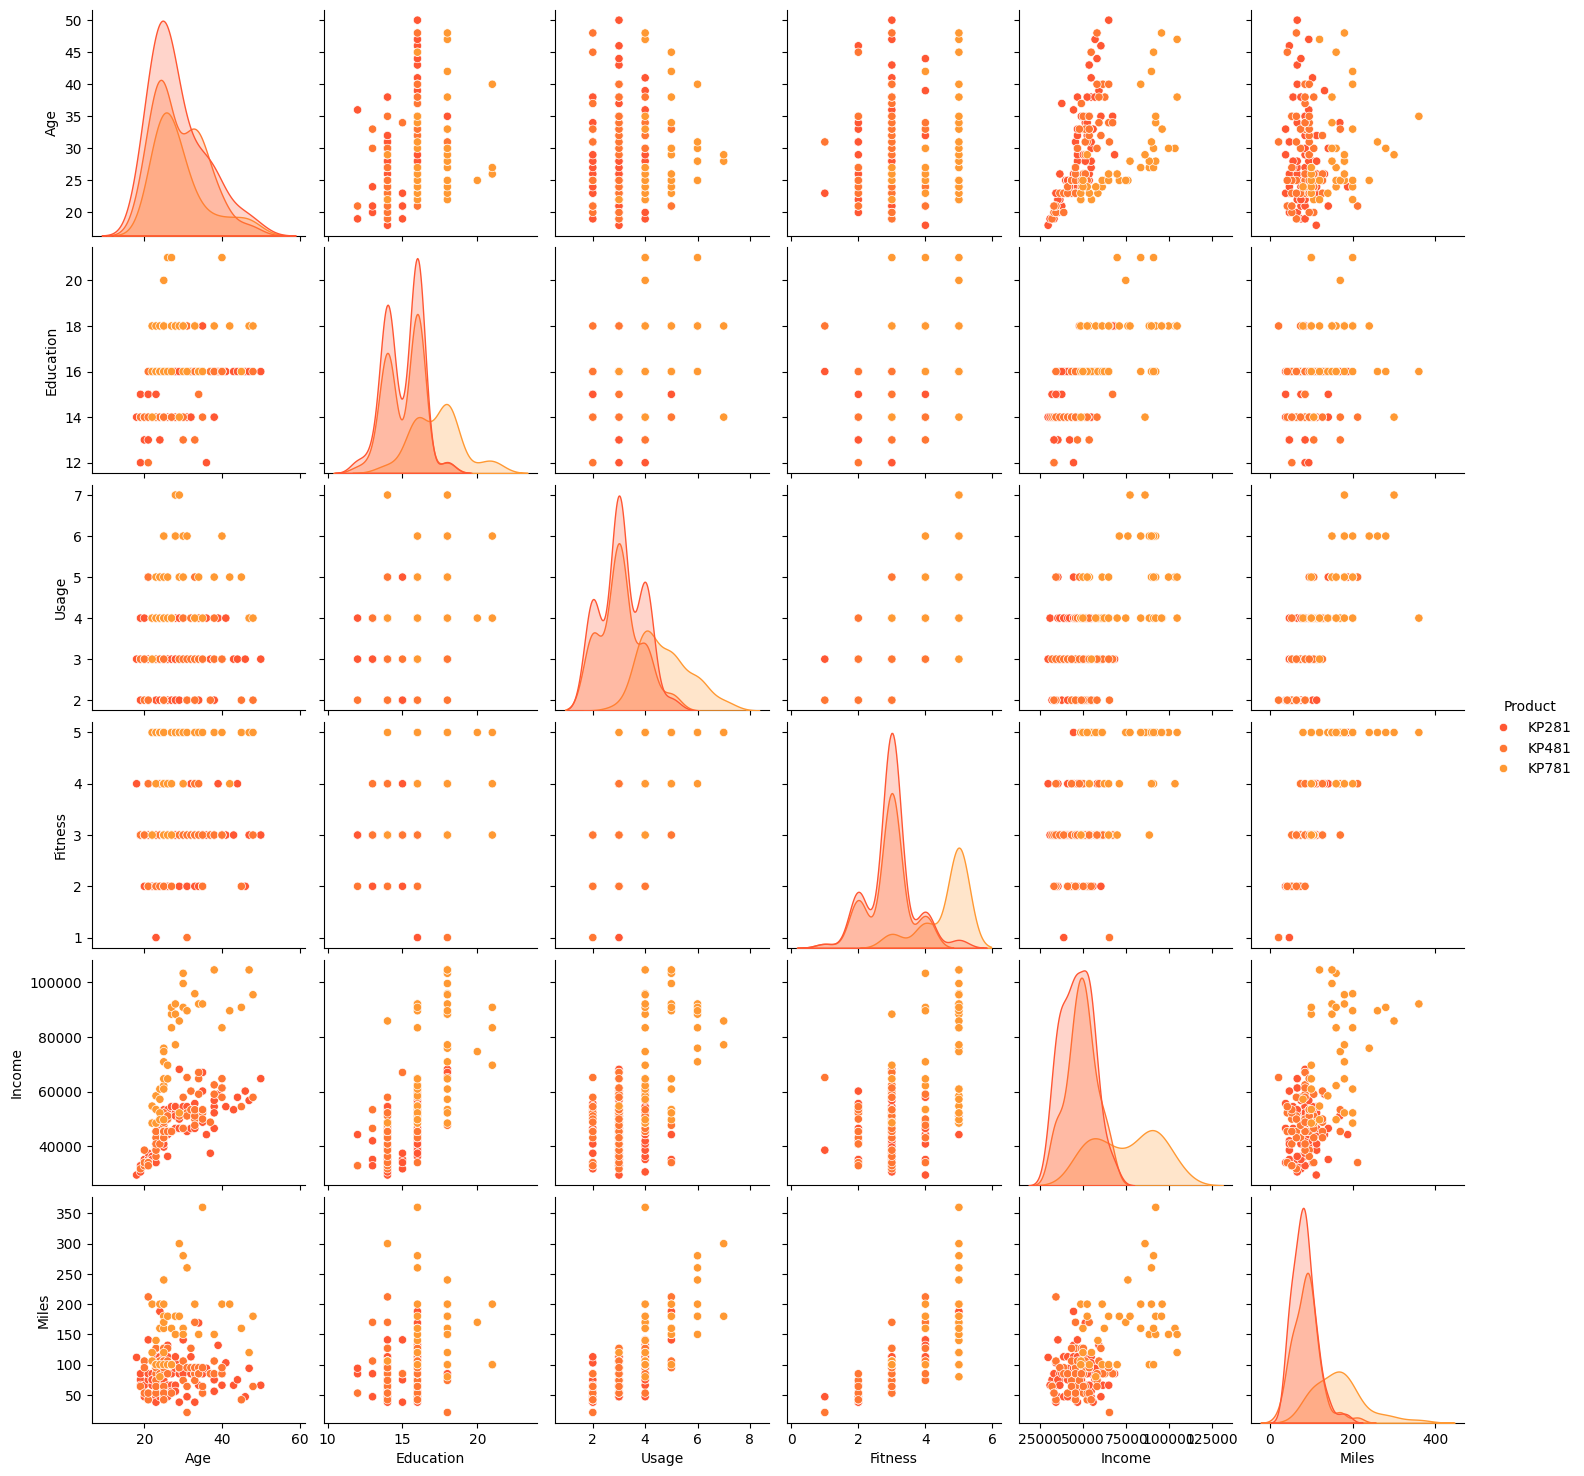

In [29]:
df_copy = copy.deepcopy(Aerofit_df)
sns.pairplot(df_copy, hue ='Product', palette= ["#FF5733", "#FF7733", "#FF9933", "#FFBB33", "#FFDD33", "#FFFF33"])
plt.show()

## 5.2 Heatmap

In [30]:
# First we need to convert object into int datatype for usage and fitness columns

df_copy['Usage'] = df_copy['Usage'].astype('int')
df_copy['Fitness'] = df_copy['Fitness'].astype('int')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int32   
 6   Fitness        180 non-null    int32   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   age_group      180 non-null    category
 10  edu_group      180 non-null    category
 11  income_group   180 non-null    category
 12  miles_group    180 non-null    category
dtypes: category(4), int32(2), int64(4), object(3)
memory usage: 12.8+ KB


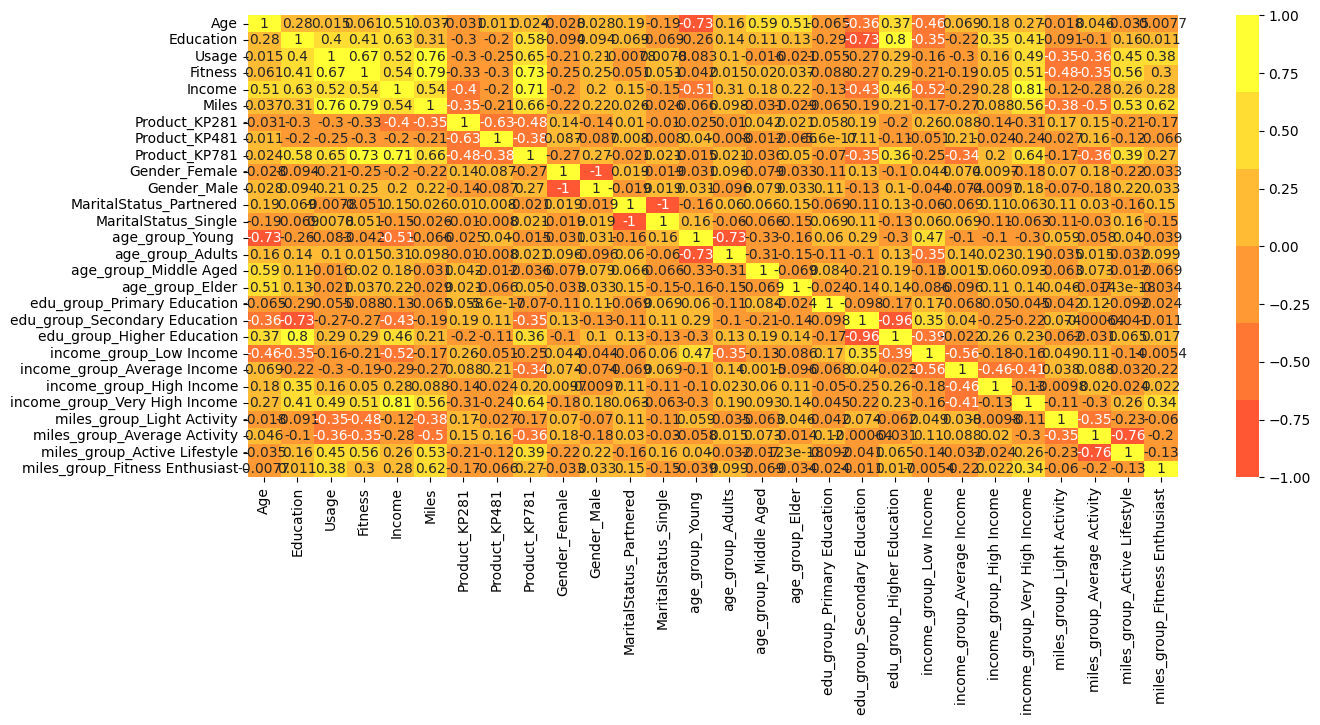

In [31]:
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df_copy)

# Calculate the correlation matrix
corr_mat = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr_mat, annot=True, cmap=["#FF5733", "#FF7733", "#FF9933", "#FFBB33", "#FFDD33", "#FFFF33"])
plt.show()


### Observations


- From the pair plot we can see `Age and Income` are **positively correlated** and heatmap also suggests a **strong correlation** betwwen them



- `Eductaion` and `Income` are highly correlated as its obvious. Eductation also has significatnt correlation between `Fitness rating and Usage of the treadmill.`



- `Usage` is highly correlated with `Fitness and Miles` as more the usage more the fitness and mileage.

# 6. Computing Probability - Marginal, Conditional Probability




## 6.1 Probability of product purchase with respect to gender

In [32]:
pd.crosstab(index =Aerofit_df['Product'],columns = Aerofit_df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


### Observations

1. The **`Probability`** of a treadmill being purchased by a **`female is 42%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is **`female`** is
    
        - For Treadmill model KP281 - **22%**
    
        - For Treadmill model KP481 - **16%**
    
        - For Treadmill model KP781 - **4%**


2. The **`Probability`** of a treadmill being purchased by a **`male is 58%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is **`male`** is -

        - For Treadmill model KP281 - **22%**
    
        - For Treadmill model KP481 - **17%**
    
        - For Treadmill model KP781 - **18%**

## 6.2 Probability of product purchase with respect to Age

In [33]:
pd.crosstab(index =Aerofit_df['Product'],columns = Aerofit_df['age_group'],margins = True,normalize = True ).round(2)

age_group,Young,Adults,Middle Aged,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


### Observations

1. The **`Probability`** of a treadmill being purchased by a **`Young Adult(18-25) is 44%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is **`Young Adult`** is
    
        - For Treadmill model KP281 - **19%**
    
        - For Treadmill model KP481 - **16%**
    
        - For Treadmill model KP781 - **9%**


2. The **`Probability`** of a treadmill being purchased by a **`Adult(26-35) is 41%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is **`Adult`** is -

        - For Treadmill model KP281 - **18%**
    
        - For Treadmill model KP481 - **13%**
    
        - For Treadmill model KP781 - **9%**
        
        
3. The **`Probability`** of a treadmill being purchased by a **`Middle Aged(36-45) is 12%`**.
        
        
4. The **`Probability`** of a treadmill being purchased by a **`Elder(Above 45) is only 3%`**.

## 6.3 Probability of product purchase with respect to Education level

In [34]:
pd.crosstab(index =Aerofit_df['Product'],columns = Aerofit_df['edu_group'],margins = True,normalize = True ).round(2)

edu_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


### Observations

1. The **`Probability`** of a treadmill being purchased by a customer with **`Higher Education(Above 15 Years) is 62%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Higher Education`** is
    
        - For Treadmill model KP281 - **23%**
    
        - For Treadmill model KP481 - **18%**
    
        - For Treadmill model KP781 - **21%**


2. The **`Probability`** of a treadmill being purchased by a customer with **`Secondary Education(13-15 yrs) is 36%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Secondary Education`** is -

        - For Treadmill model KP281 - **21%**
    
        - For Treadmill model KP481 - **14%**
    
        - For Treadmill model KP781 - **1%**
        
        
3. The **`Probability`** of a treadmill being purchased by a customer with **`Primary Education(0 to 12 yrs) is only 2%`**.

## 6.4 Probability of product purchase with respect to Income

In [35]:
pd.crosstab(index =Aerofit_df['Product'],columns = Aerofit_df['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Average Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


### Observations

1. The **`Probability`** of a treadmill being purchased by a customer with **`Low Income(<40k) is 18%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Low Income`** is  -
        - For Treadmill model KP281 - **13%**
    
        - For Treadmill model KP481 - **5%**
    
        - For Treadmill model KP781 - **0%**
        
        
2. The **`Probability`** of a treadmill being purchased by a customer with **`Moderate Income(40k - 60k) is 59%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Moderate Income`** is  -
        - For Treadmill model KP281 - **28%**
    
        - For Treadmill model KP481 - **24%**
    
        - For Treadmill model KP781 - **6%**
        

3. The **`Probability`** of a treadmill being purchased by a customer with **`High Income(60k - 80k) is 13%`**

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`High Income`** is  -
    
        - For Treadmill model KP281 - **3%**
    
        - For Treadmill model KP481 - **4%**
    
        - For Treadmill model KP781 - **6%**
        
        
4. The **`Probability`** of a treadmill being purchased by a customer with **`Very High Income(>80k) is 11%`**

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`High Income`** is  -
    
        - For Treadmill model KP281 - **0%**
    
        - For Treadmill model KP481 - **0%**
    
        - For Treadmill model KP781 - **11%**
        

## 6.5 Probability of product purchase with respect to Marital Status

In [36]:
pd.crosstab(index =Aerofit_df['Product'],columns = Aerofit_df['MaritalStatus'],margins = True,normalize = True ).round(2)


MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


### Observations

1. The **`Probability`** of a treadmill being purchased by a **`Married Customer is 59%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is **`Married`** is
    
        - For Treadmill model KP281 - **27%**
    
        - For Treadmill model KP481 - **20%**
    
        - For Treadmill model KP781 - **13%**


2. The **`Probability`** of a treadmill being purchased by a **`Unmarried Customer is 41%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer is **`Unmarried`** is -

        - For Treadmill model KP281 - **18%**
    
        - For Treadmill model KP481 - **13%**
    
        - For Treadmill model KP781 - **9%**

## 6.6 Probability of product purchase with respect to Weekly Usage

In [37]:
pd.crosstab(index =Aerofit_df['Product'],columns = Aerofit_df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


### Observations

1. The **`Probability`** of a treadmill being purchased by a customer with **`Usage 3 per week is 38%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Usage 3 per week`** is  -
        - For Treadmill model KP281 - **21%**
    
        - For Treadmill model KP481 - **17%**
    
        - For Treadmill model KP781 - **1%**
        
        
2. The **`Probability`** of a treadmill being purchased by a customer with **`Usage 4 per week is 29%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Usage 4 per week`** is  -
        - For Treadmill model KP281 - **12%**
    
        - For Treadmill model KP481 - **7%**
    
        - For Treadmill model KP781 - **10%**

3. The **`Probability`** of a treadmill being purchased by a customer with **`Usage 2 per week is 18%`**

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Usage 2 per week`** is  -
        - For Treadmill model KP281 - **11%**
    
        - For Treadmill model KP481 - **8%**
    
        - For Treadmill model KP781 - **0%**
        


## 6.7 Probability of product purchase with respect to Customer Fitness

In [38]:
pd.crosstab(index =Aerofit_df['Product'],columns = Aerofit_df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


### Observations

1. The **`Probability`** of a treadmill being purchased by a customer with **`Average(3) Fitness is 54%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Average Fitness`** is  -
        - For Treadmill model KP281 - **30%**
    
        - For Treadmill model KP481 - **22%**
    
        - For Treadmill model KP781 - **2%**
        

2. The **`Probability`** of a treadmill being purchased by a customer with **`Fitness of 2,4,5 is almost 15%`**.


3. The **`Probability`** of a treadmill being purchased by a customer with **`very low(1) Fitness is only 1%`**.

## 6.8 Probability of product purchase with respect to weekly mileage

In [39]:
pd.crosstab(index =Aerofit_df['Product'],columns = Aerofit_df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Average Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


### Observations

1. The **`Probability`** of a treadmill being purchased by a customer with lifestyle of **`Light Activity(0 to 50 miles/week) is 9%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Light Activity Lifestyle`** is  -
        
        - For Treadmill model KP281 - **7%**
    
        - For Treadmill model KP481 - **3%**
    
        - For Treadmill model KP781 - **0%**
        
        
2. The **`Probability`** of a treadmill being purchased by a customer with lifestyle of **`Average Activity(51 to 100 miles/week) is 54%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer with lifestyle of **`Average Activity`** is  -
        - For Treadmill model KP281 - **28%**
    
        - For Treadmill model KP481 - **22%**
    
        - For Treadmill model KP781 - **4%**
        

2. The **`Probability`** of a treadmill being purchased by a customer has **`Active Lifestyle(100 to 200 miles/week) is 33%`**.

    - **`The conditional probability`** of purchasing the treadmill model given that the customer has **`Active Lifestyle`** is  -
        - For Treadmill model KP281 - **10%**
    
        - For Treadmill model KP481 - **8%**
    
        - For Treadmill model KP781 - **15%**
        
        
4. The **`Probability`** of a treadmill being purchased by a customer who is **`Fitness Enthusiast(>200 miles/week) is 3% only`**
        

Based on above analysis

- Probability of purchase of KP281 = 44%
- Probability of purchase of KP481 = 33%
- Probability of purchase of KP781 = 22%


- `Customer Profile` for `KP281` Treadmill:

    - Age of customer mainly between 18 to 35 years  with few between 35 to 50 years
    - Education level of customer 13 years and above
    - Annual Income of customer below USD 60,000
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 100 miles
    
    
- `Customer Profile` for `KP481` Treadmill:

    - Age of customer mainly between 18 to 35 years  with few between 35 to 50 years
    - Education level of customer 13 years and above
    - Annual Income of customer between USD 40,000 to USD 80,000
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 200 miles


- `Customer Profile` for `KP781` Treadmill:

    - Gender - Male
    - Age of customer between 18 to 35 years
    - Education level of customer 15 years and above
    - Annual Income of customer USD 80,000 and above
    - Weekly Usage - 4 to 7 times
    - Fitness Scale - 3 to 5
    - Weekly Running Mileage - 100 miles and above


##  Marketing Strategies for KP781

* The KP784 model demonstrates a notable gender sales gap, with only 18% of total sales attributed to female customers. To improve this metric, implementing targeted approaches such as exclusive promotions and trials tailored for female customers is advisable.

### Cost-Effective Pricing and Payment Options

* Considering the age, education, and income demographics of the target audience, it's vital to offer the KP281 and KP481 Treadmill at affordable price points. Additionally, providing flexible payment plans can enable customers to manage the cost over multiple months, making the treadmill more accessible across different budget ranges.

### Intuitive App Integration

* Develop a user-friendly app that seamlessly integrates with the treadmill. This app could monitor users' weekly running mileage, deliver real-time feedback on their progress, and offer customized workout recommendations based on their fitness level and objectives. Such integration can enrich the overall treadmill experience and sustain user engagement.